##### Part one:   Library and SnakeGame
##### Part two:   Action that we want 
##### Part three: Q-learning rule
##### Part four:  Q Learing
##### Part Five:  Run Training and hyperparameters

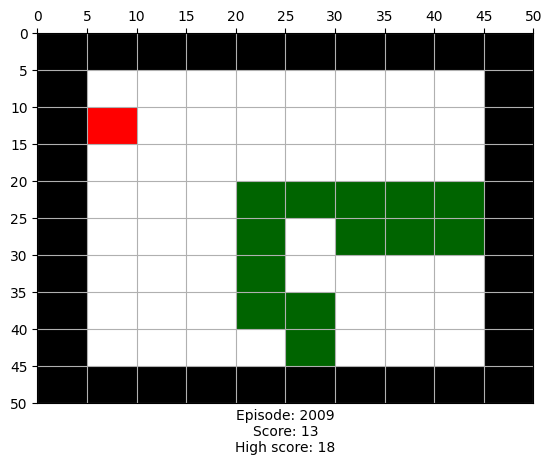

Best score reached:  18


In [14]:
## part one: In this section, we import the necessary libraries and also import the AGSnakeGame class from the SnakeGame.py file, which we will use in our task.
import numpy as np
import time
from SnakeGame import SnakeGame

## part two: We define the AG_choose_action function to implement the epsilon-greedy policy. With probability epsilon, a random action (turn left, go straight, or turn right) is selected to encourage exploration. Otherwise, the best action based on the highest Q-value for the current state is chosen.
def AG_choose_action(AG_Q, AG_state, AG_epsilon):
    if np.random.rand() < AG_epsilon:
        return np.random.choice(3)  # Return random action: turn left, go straight, or turn right
    else:
        return np.argmax(AG_Q[AG_state])  # Return the best action based on Q-value

## part three: This function applies the Q-learning update rule. It updates the Q-value based on the current state, action, reward, and next state.
def AG_update_Q(AG_Q, AG_old_state, AG_state, AG_action, AG_reward, AG_learning_rate, AG_discount):
    AG_best_next_action = np.argmax(AG_Q[AG_state])  # Find the best next action
    AG_Q[AG_old_state, AG_action] += AG_learning_rate * (AG_reward + AG_discount * AG_Q[AG_state, AG_best_next_action] - AG_Q[AG_old_state, AG_action])  # Update Q-value

## part four: This function facilitates the training of the Q-learning agent over multiple episodes. We initialize various game-related elements such as the Q-table for 64 states and other parameters for exploration and state transitions.
def AG_Q_learning(AG_game, AG_episodes, AG_learning_rate, AG_discount, AG_start_exploration, AG_end_exploration, AG_render_from_episode=-10):
    AG_Q = np.zeros((64, 3))  # Initialize Q-table for the game
    AG_scores = []

    for AG_episode in range(AG_episodes):
        AG_epsilon = AG_start_exploration + (AG_end_exploration - AG_start_exploration) * (AG_episode / AG_episodes)  # Linearly decay epsilon from start to end exploration
        AG_game.init_game()  # Initialize game for the episode
        AG_old_state = AG_game.get_state()  # Get the initial state of the game
        AG_continues = True

        while AG_continues:
            AG_action = AG_choose_action(AG_Q, AG_old_state, AG_epsilon)  # Choose action based on epsilon-greedy policy
            AG_continues, AG_reward, AG_state = AG_game.step(AG_action)  # Take action and get the next state and reward
            AG_update_Q(AG_Q, AG_old_state, AG_state, AG_action, AG_reward, AG_learning_rate, AG_discount)  # Update Q-value based on reward and next state
            AG_old_state = AG_state  # Update the old state to the new state

            if AG_episode >= AG_render_from_episode % AG_episodes:
                AG_game.render(episode=AG_episode, high_score=np.max(AG_scores))  # Render the game at certain episodes
                time.sleep(1 / 60)  # Slow down rendering to view actions and observe training progress

        AG_scores.append(AG_game.score())  # Append the score at the end of the episode

    return AG_Q, AG_scores

## part five: We set up the hyperparameters for the project, such as episodes, learning rate, discount, and exploration rate. After that, we call the Q-learning function and obtain results. These hyperparameters can be adjusted to tune the model's behavior.
AG_episodes = 2010
AG_learning_rate = 0.1
AG_discount = 0.9
AG_start_exploration = 1.0
AG_end_exploration = 0.1

AG_Q, AG_scores = AG_Q_learning(SnakeGame(), AG_episodes, AG_learning_rate, AG_discount, AG_start_exploration, AG_end_exploration)
print("Best score reached: ", np.max(AG_scores))  # Changed output title to "Best score reached"
